In [1]:
from drn_interactions.load import load_eeg, load_eeg_ts, load_lfp, load_lfp_ts
from scipy.stats import variation, zscore
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans




In [2]:
def plot_spectra(df, k_clusters=2, figsize=(20, 7)):
    df = df.copy()
    _, axes = plt.subplots(ncols=4, figsize=figsize)

    n_clusters = list(range(2, 8))
    error = []
    for k in n_clusters:
        error.append(KMeans(k).fit(df).inertia_)
    axes[1].plot(n_clusters, error, "k-o")

    df["cluster"] = KMeans(k_clusters, random_state=42).fit_predict(df)
    sns.heatmap(df.sort_values("cluster").drop("cluster", axis=1).transpose().iloc[::-1], robust=True, cmap="viridis", ax=axes[2], center=0, vmin=-1, vmax=1)

    dfp = df.melt(id_vars="cluster", var_name="freq", value_name="value").assign(band=lambda x: np.where(x["freq"] < 4, "delta", "theta"))
    sns.barplot(x="band", y="value", hue="cluster", data=dfp, ax=axes[3])

    sns.heatmap(df.transpose().iloc[::-1], robust=True, cmap="viridis", ax=axes[0], center=0)

    return df.reset_index()[["timepoint_s", "cluster"]]


def plot_session(df_fft, session, n_clusters):
    df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
    )
    idx = IsolationForest().fit_predict(df1)
    df1.iloc[idx == -1, :] = np.nan 
    df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)
    df2 = df1.apply(zscore).transpose().apply(zscore).transpose()
    values = gaussian_filter(df2, sigma=(2, 2))
    dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
    dfp = plot_spectra(dfp, k_clusters=n_clusters)
    return dfp





In [3]:
df_fft = load_eeg(block_name="pre").loc[lambda x: x.timepoint_s <= (30 * 60)]
df_ts = load_eeg_ts(block_name="pre")

In [9]:
session_names = df_ts.session_name.unique()
out = {}

ESHOCK_01


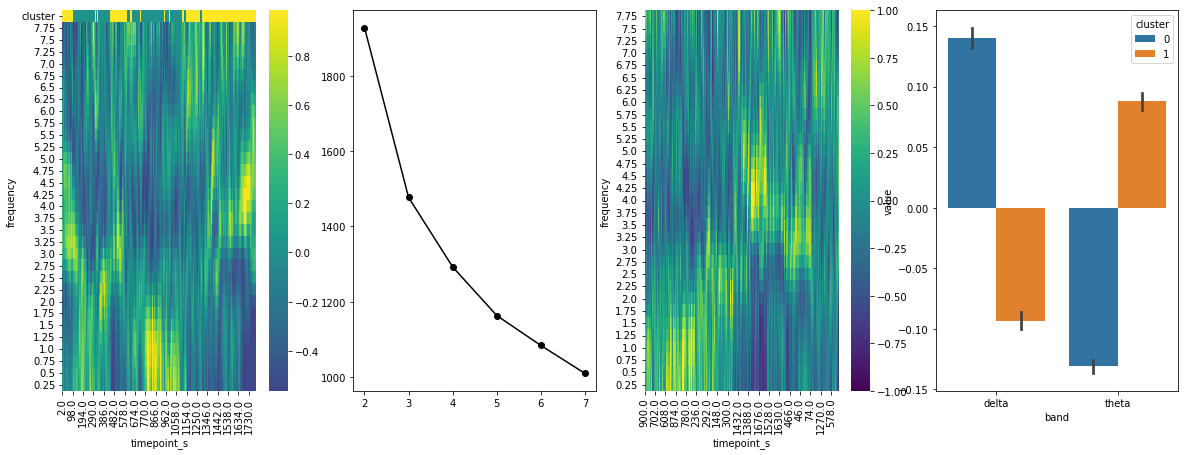

In [63]:
session = session_names[0]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "poor"

out[session] = clusters.assign(session_name = session)

ESHOCK_02


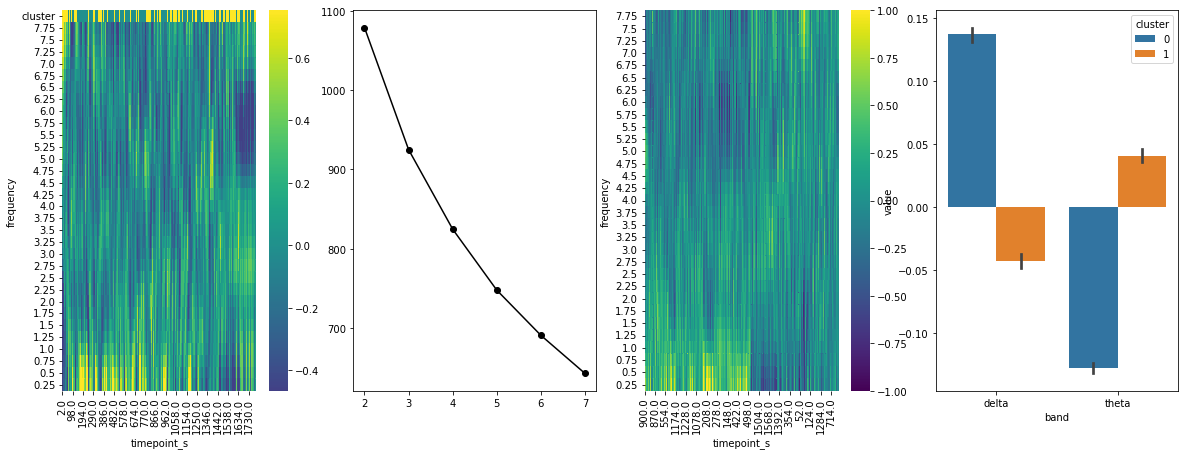

In [62]:
session = session_names[1]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "poor"


out[session] = clusters.assign(session_name = session)

ESHOCK_03_LOC1


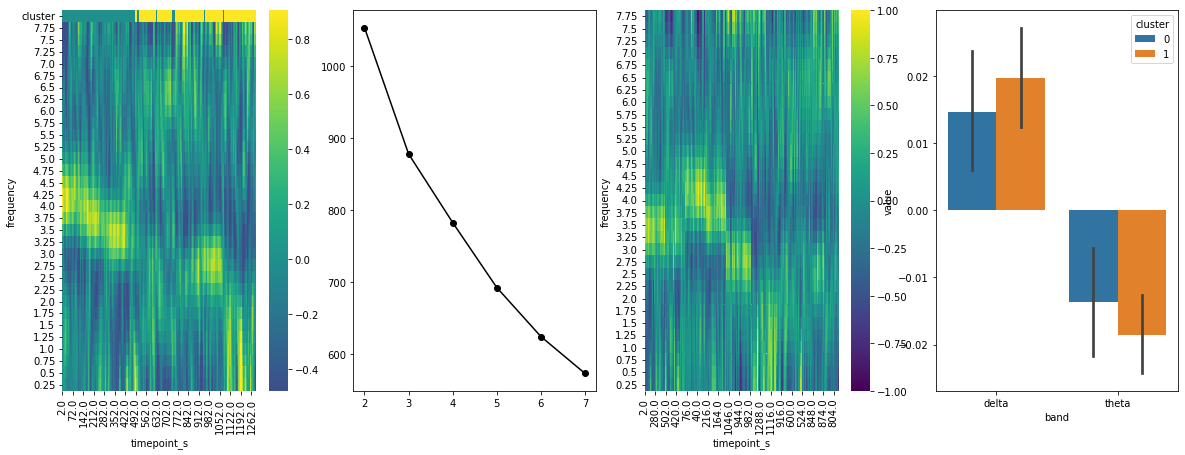

In [61]:
session = session_names[2]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

ESHOCK_04_LOC1


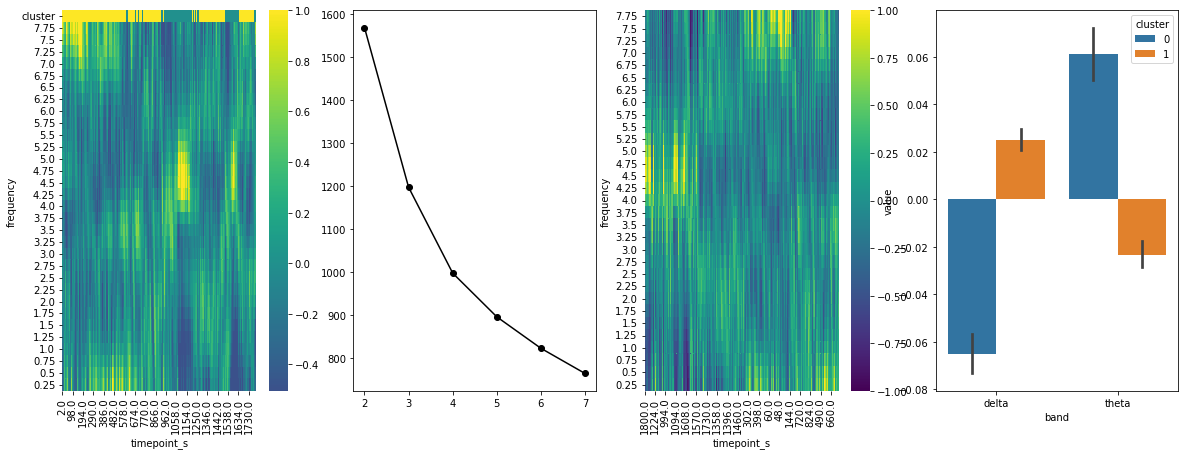

In [60]:
session = session_names[3]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

ESHOCK_06_LOC1


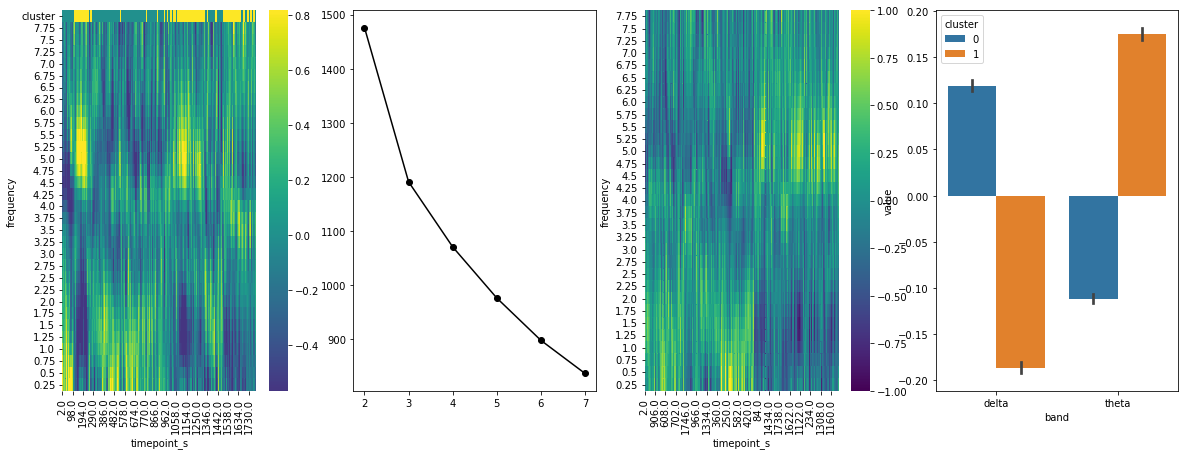

In [59]:
session = session_names[4]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

ESHOCK_07_LOC1


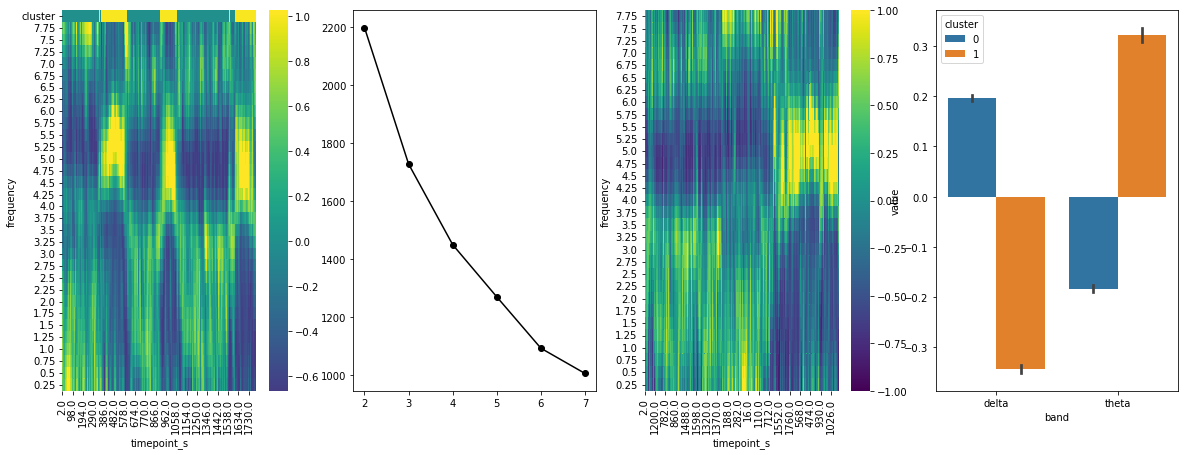

In [57]:
session = session_names[5]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

ESHOCK_08_LOC1


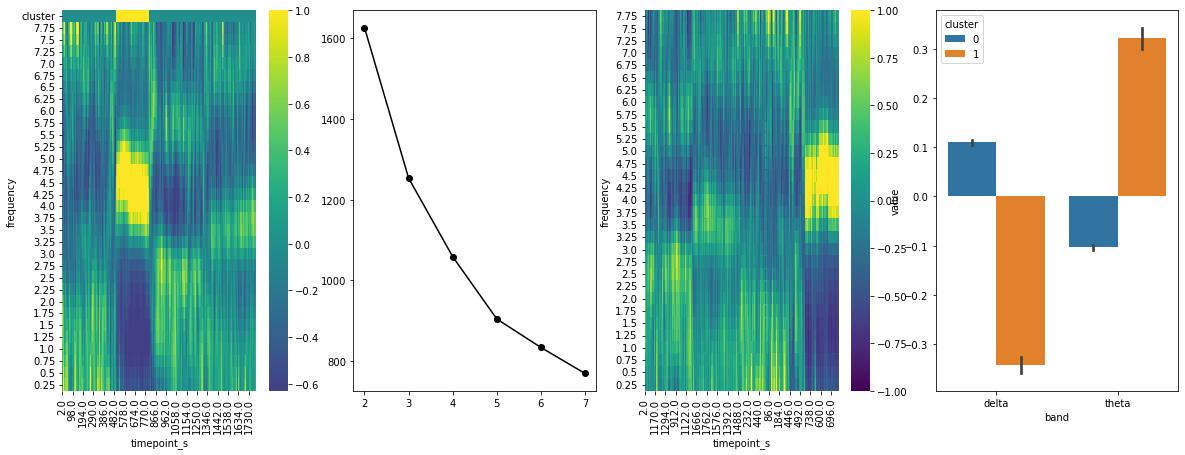

In [56]:
session = session_names[6]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

ESHOCK_09_LOC1


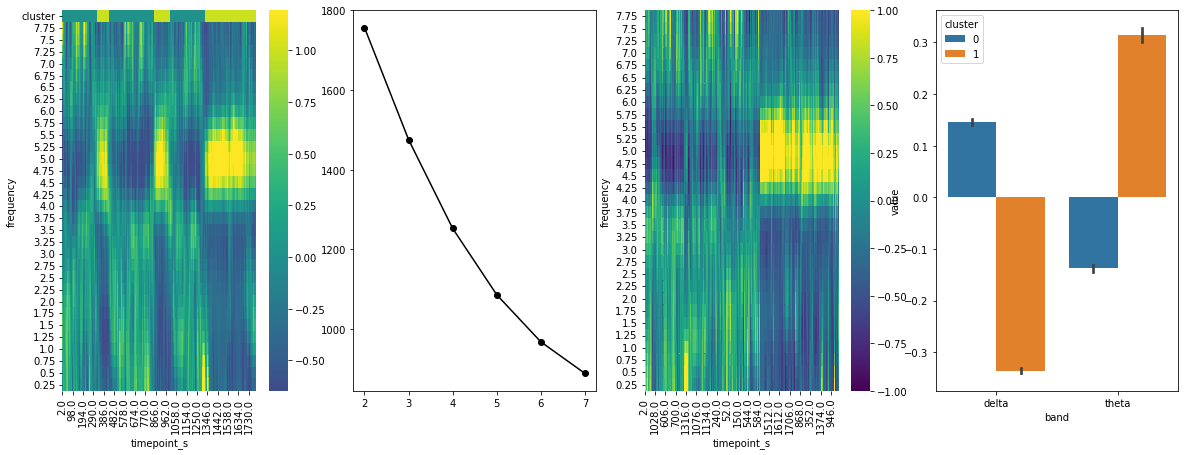

In [48]:
session = session_names[7]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

acute_11


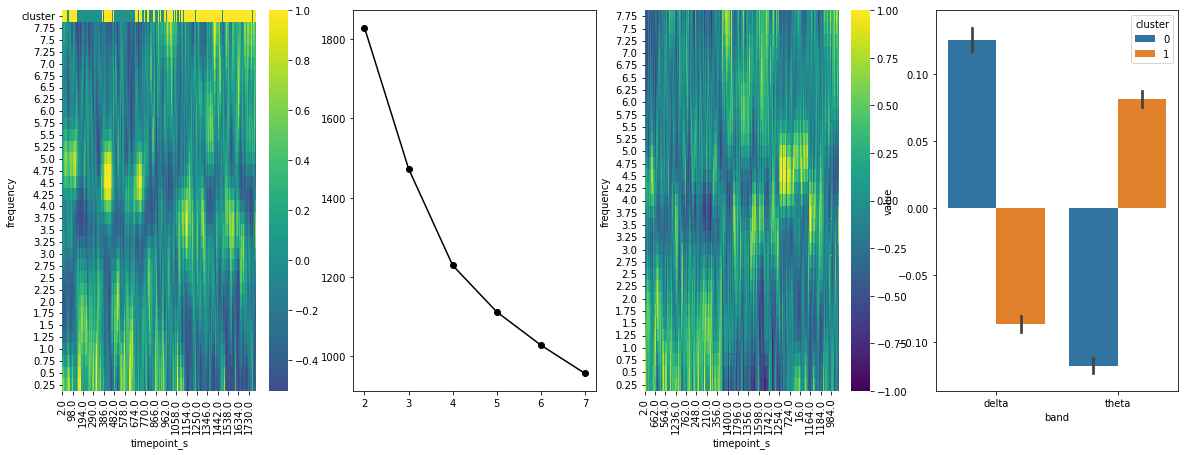

In [46]:
session = session_names[8]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_12


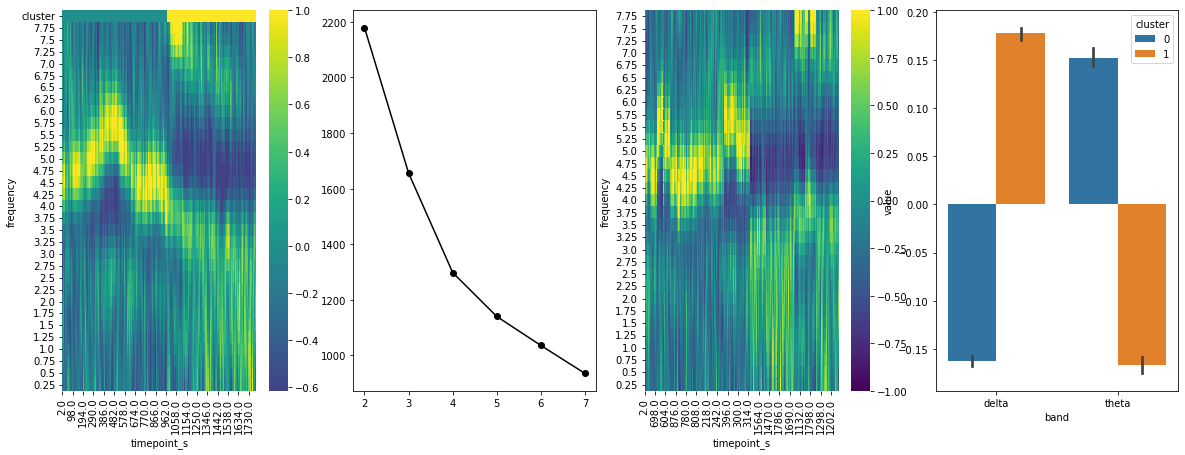

In [41]:
session = session_names[9]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

acute_14


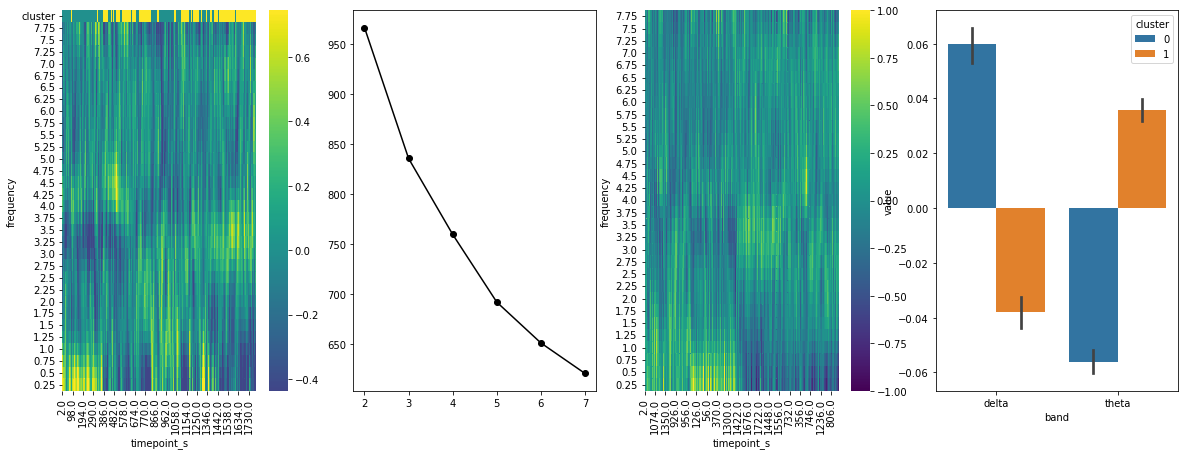

In [40]:
session = session_names[10]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_15


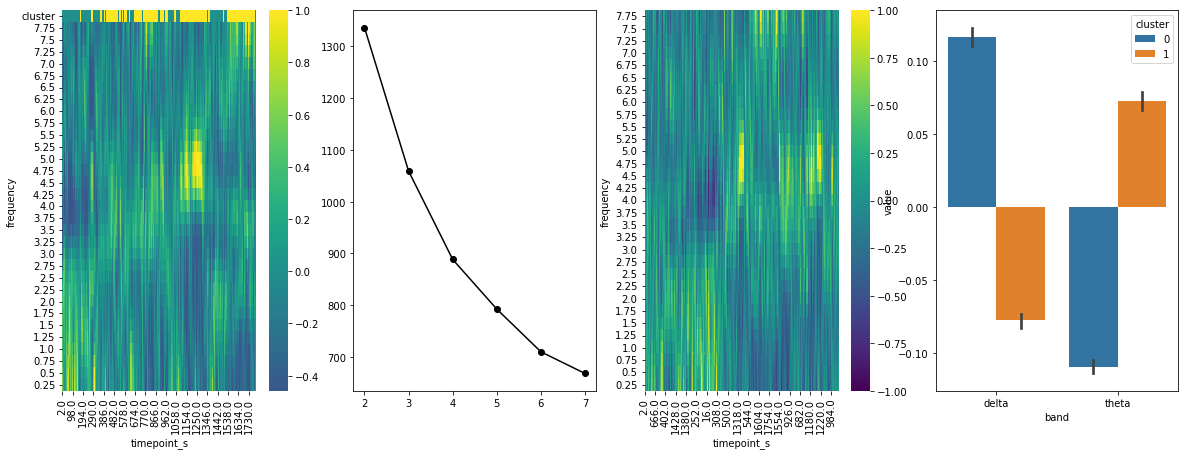

In [39]:
session = session_names[11]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_16


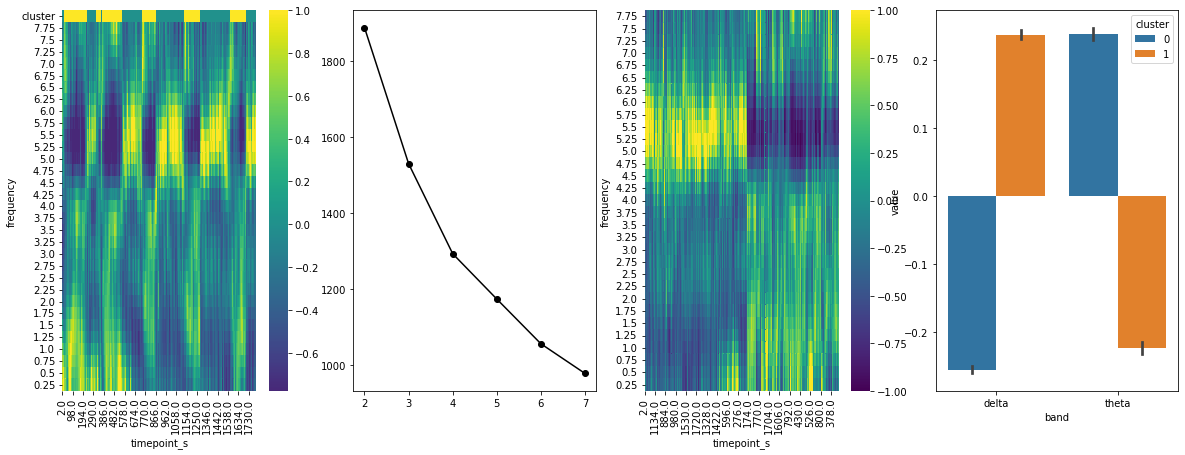

In [38]:
session = session_names[12]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

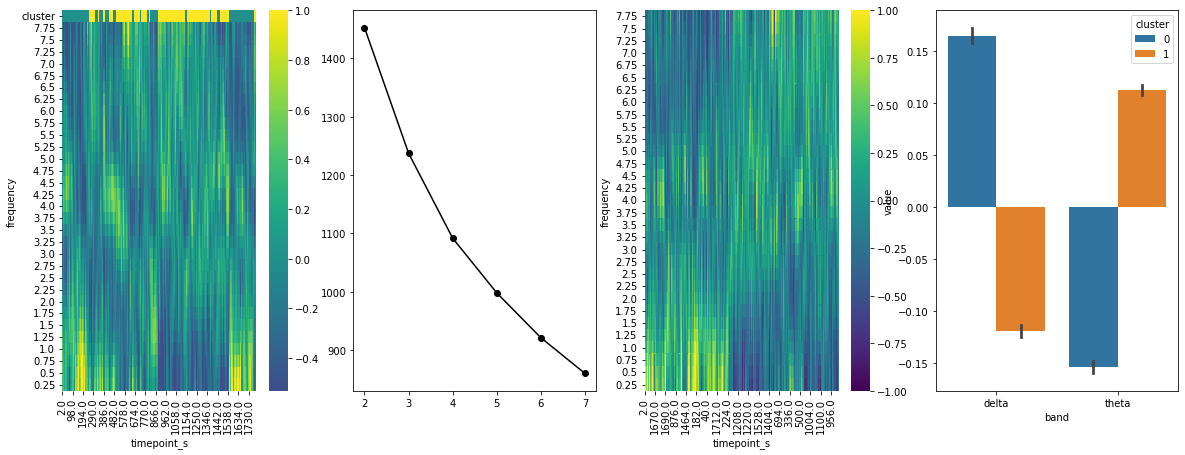

In [37]:
session = session_names[13]

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

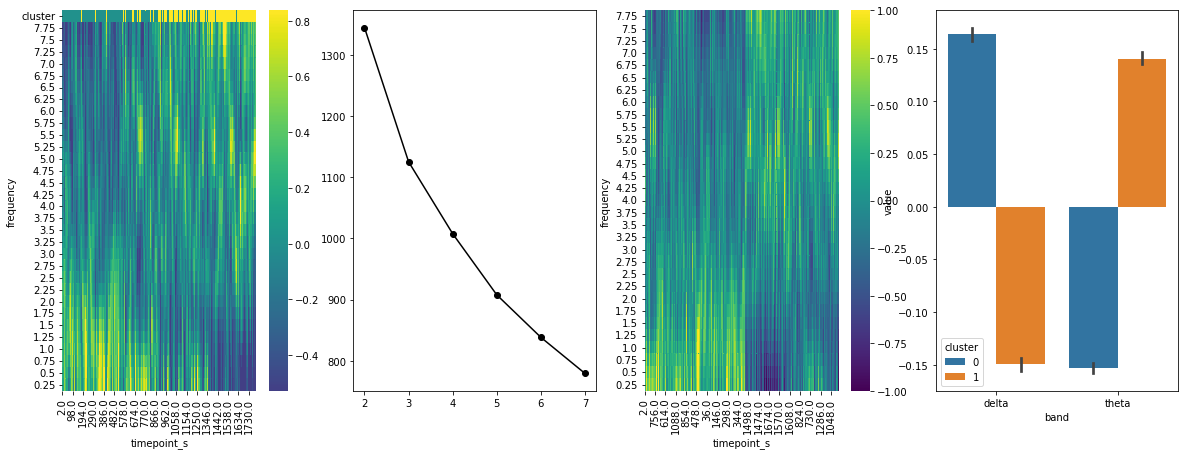

In [36]:
session = session_names[14]

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

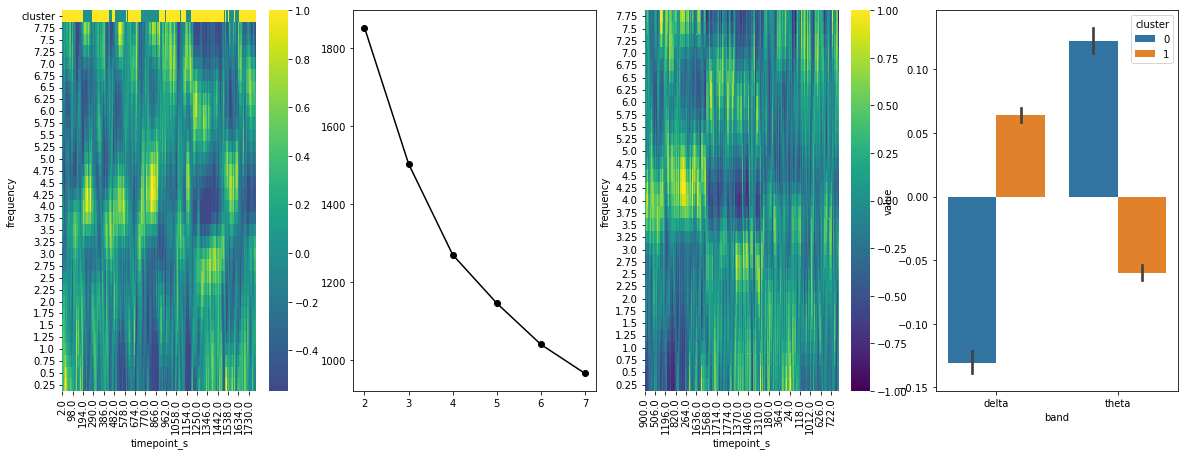

In [30]:
session = session_names[15]

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {1: "sw", 0: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

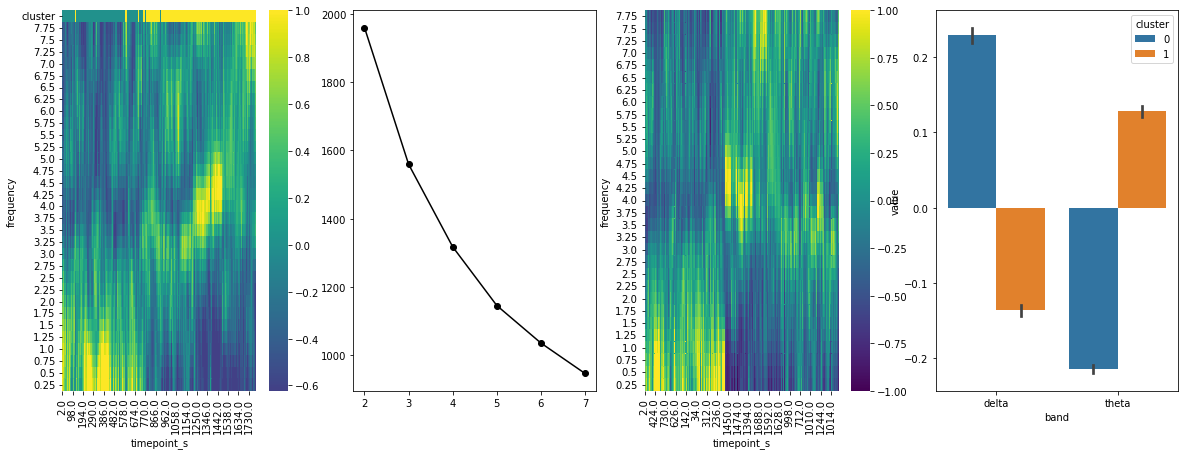

In [34]:
session = session_names[16]

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

In [67]:
df_out = pd.concat([v for v in out.values()])

In [71]:
from drn_interactions.load import get_derived_data_dir

OUTDIR = get_derived_data_dir()

df_out.assign(timepoint_s = lambda x: x.timepoint_s - 2).to_csv(OUTDIR / "eeg_states.csv", index=False)

ESHOCK_03_LOC1


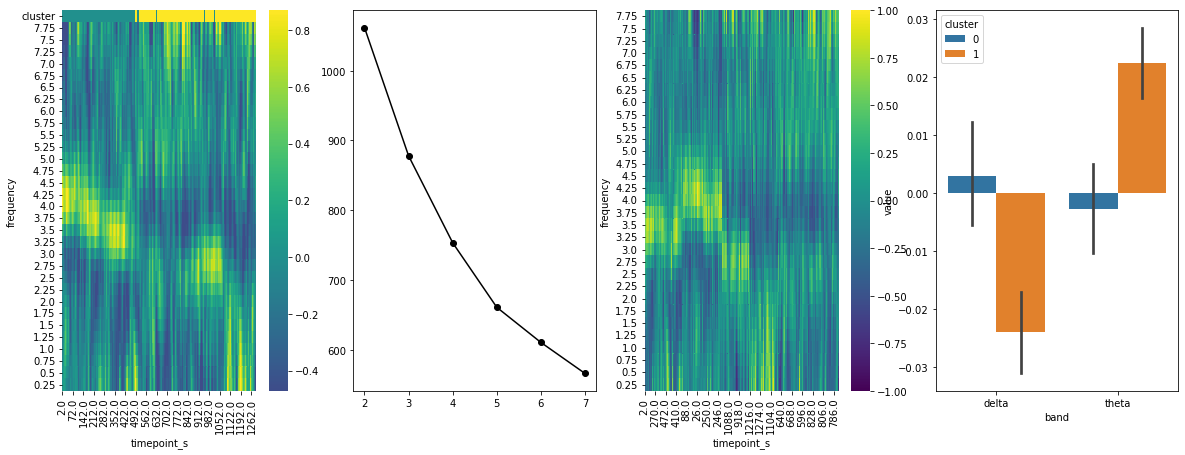

In [ ]:
session = session_names[2]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

out[session] = clusters.assign(session_name = session)

ESHOCK_03_LOC1


<Figure size 432x288 with 0 Axes>

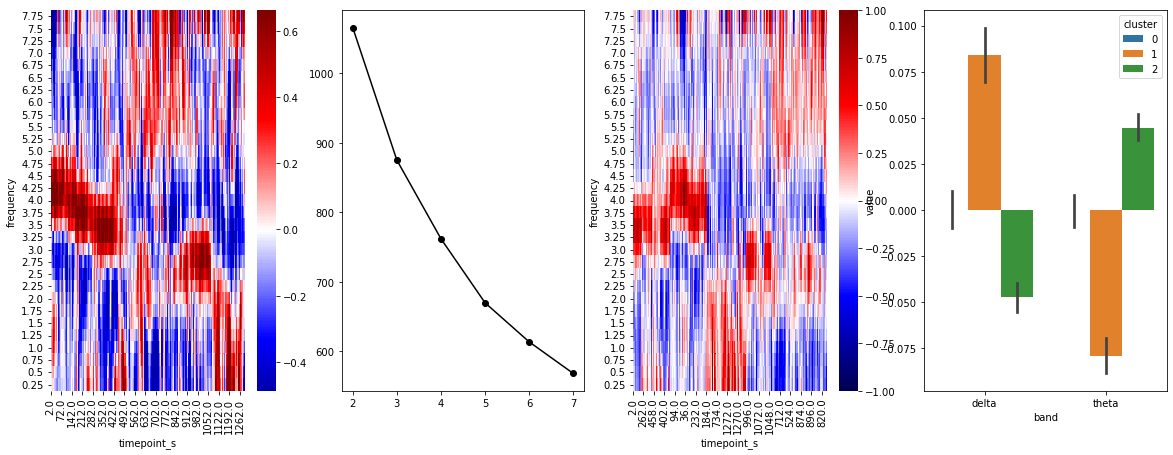

In [286]:
session_names = df_ts.session_name.unique()
session = session_names[2]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=3)

ESHOCK_04_LOC1


<Figure size 432x288 with 0 Axes>

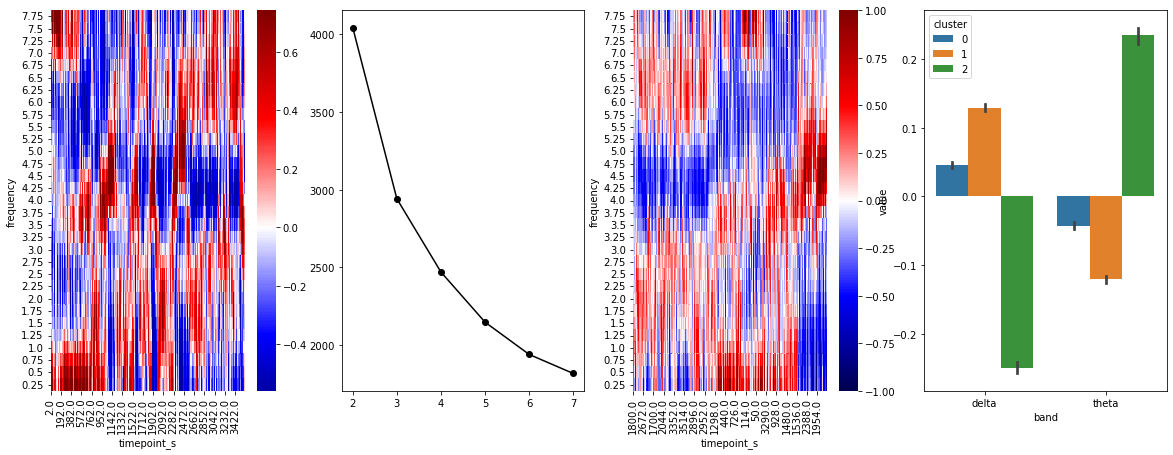

In [287]:
session_names = df_ts.session_name.unique()
session = session_names[3]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=3)

ESHOCK_06_LOC1


<Figure size 432x288 with 0 Axes>

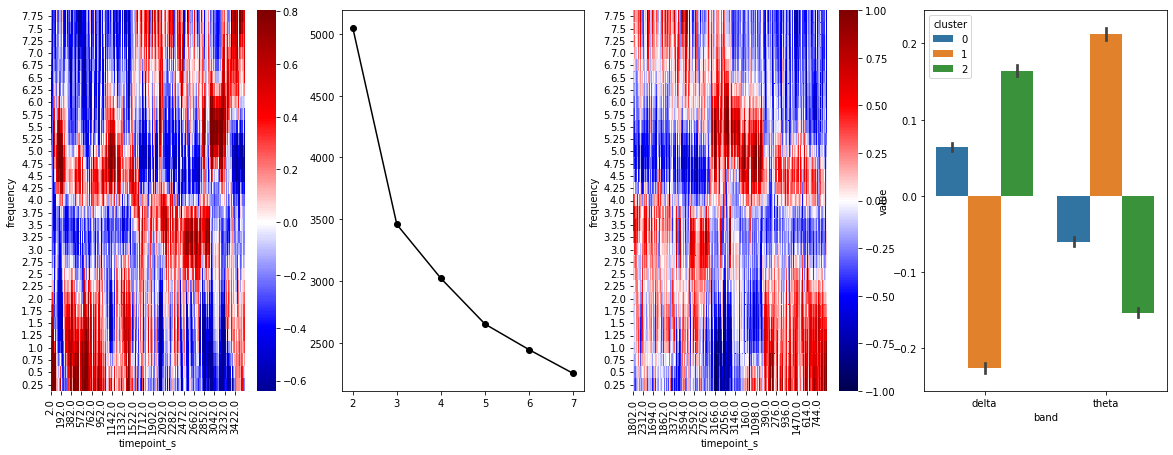

In [288]:
session_names = df_ts.session_name.unique()
session = session_names[4]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=3)

ESHOCK_07_LOC1


<Figure size 432x288 with 0 Axes>

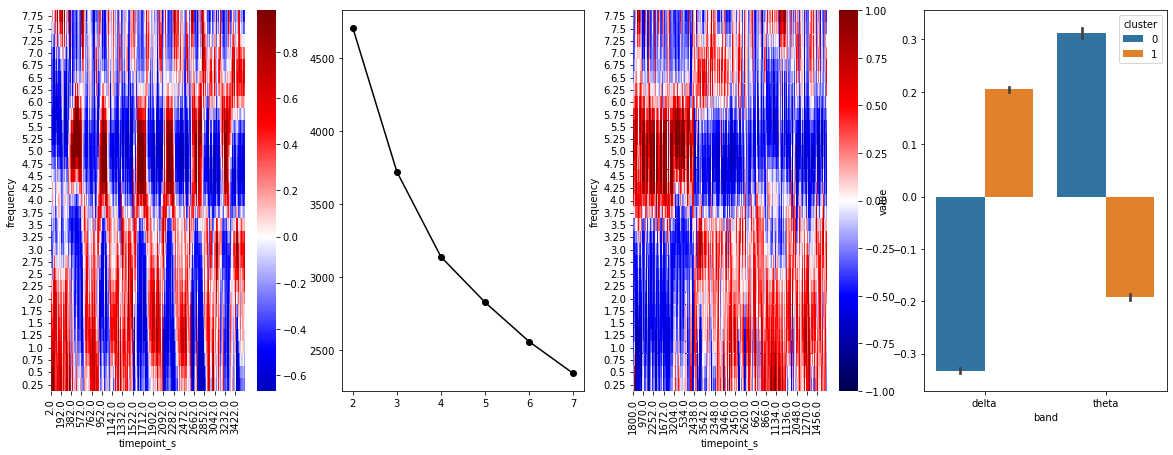

In [290]:
session_names = df_ts.session_name.unique()
session = session_names[5]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

ESHOCK_08_LOC1


<Figure size 432x288 with 0 Axes>

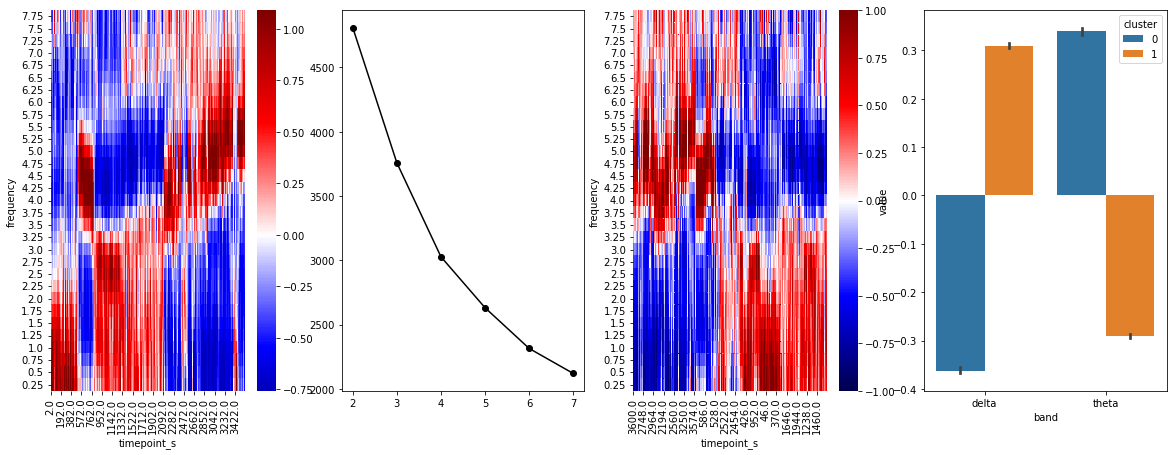

In [291]:
session_names = df_ts.session_name.unique()
session = session_names[6]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

ESHOCK_09_LOC1


<Figure size 432x288 with 0 Axes>

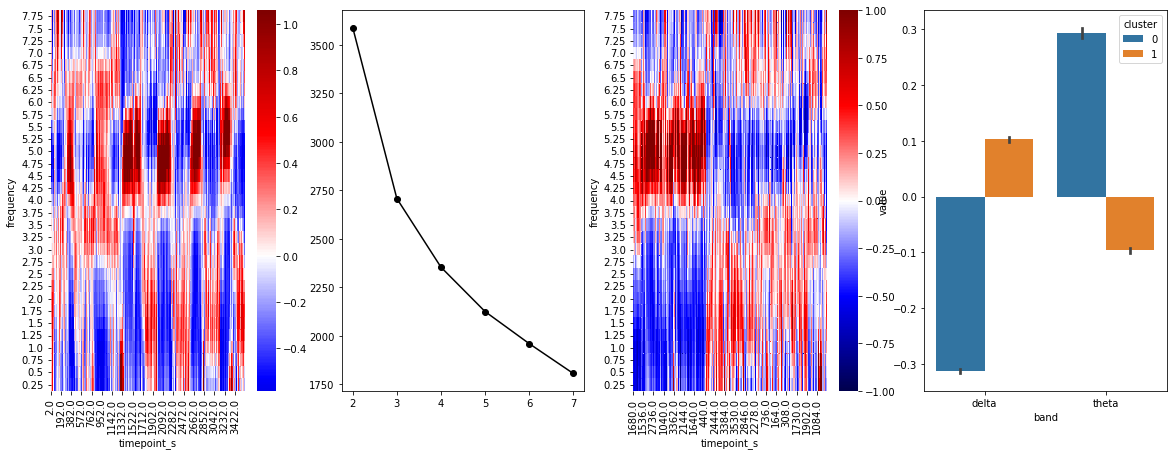

In [292]:
session_names = df_ts.session_name.unique()
session = session_names[7]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

acute_11


<Figure size 432x288 with 0 Axes>

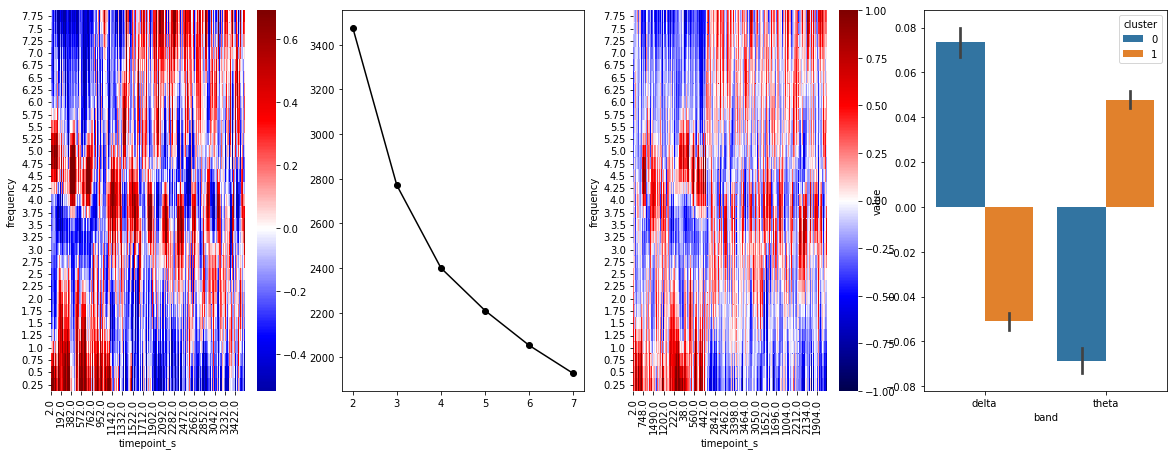

In [293]:
session_names = df_ts.session_name.unique()
session = session_names[8]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

acute_12


<Figure size 432x288 with 0 Axes>

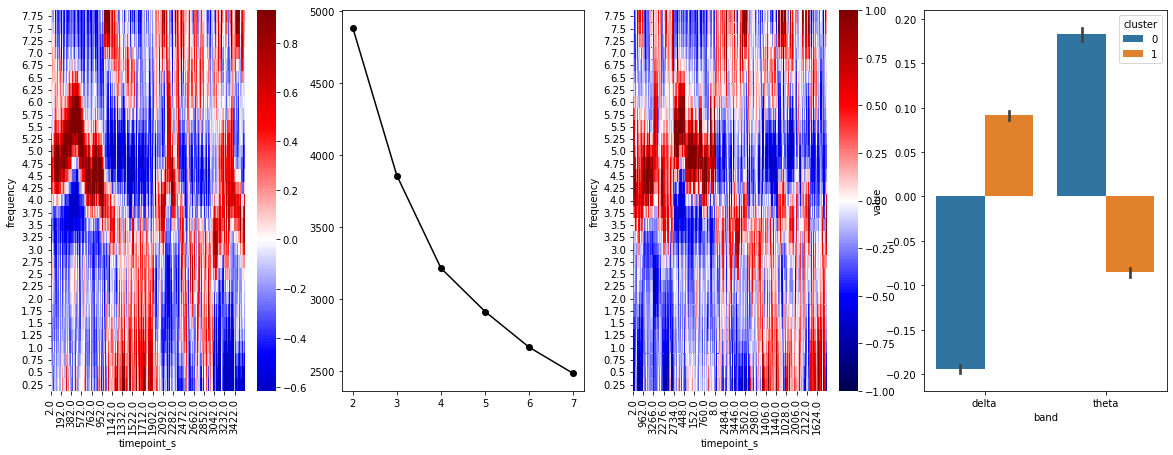

In [294]:
session_names = df_ts.session_name.unique()
session = session_names[9]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

acute_14


<Figure size 432x288 with 0 Axes>

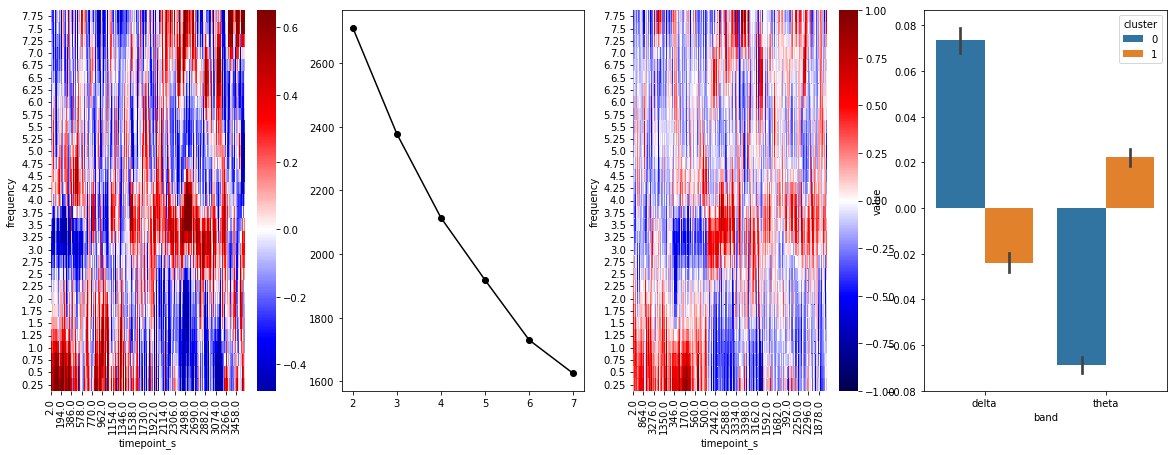

In [295]:
session_names = df_ts.session_name.unique()
session = session_names[10]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

acute_15


<Figure size 432x288 with 0 Axes>

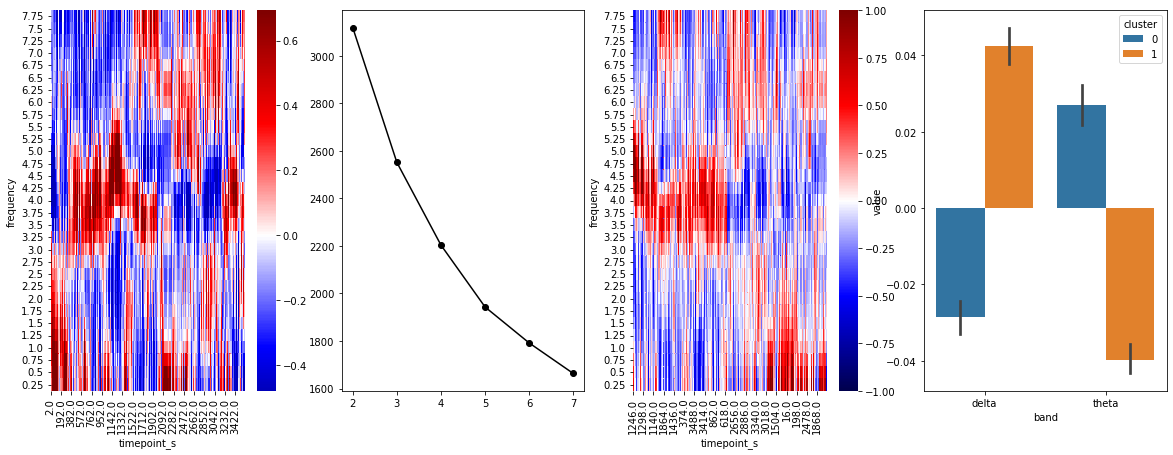

In [296]:
session_names = df_ts.session_name.unique()
session = session_names[11]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

acute_16


<Figure size 432x288 with 0 Axes>

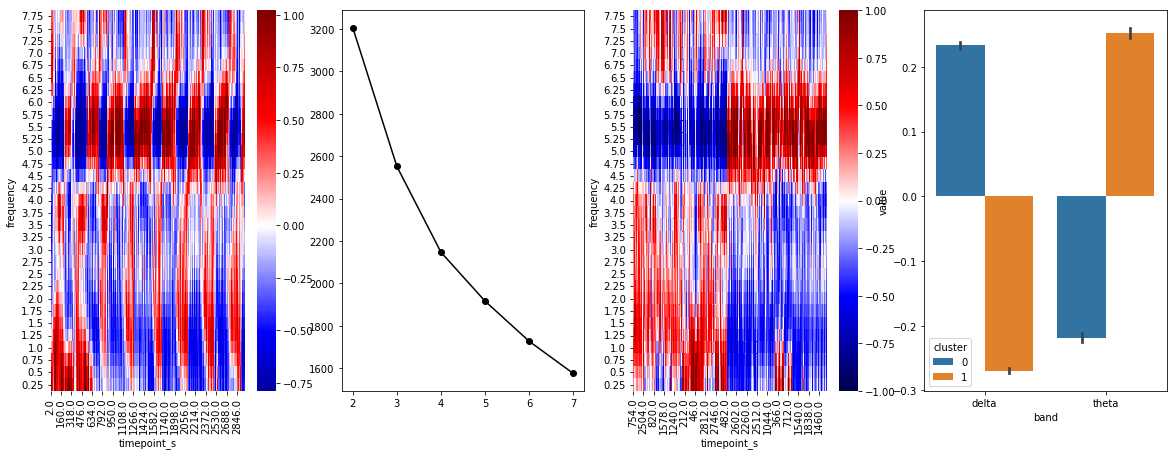

In [297]:
session_names = df_ts.session_name.unique()
session = session_names[12]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

hamilton_03


<Figure size 432x288 with 0 Axes>

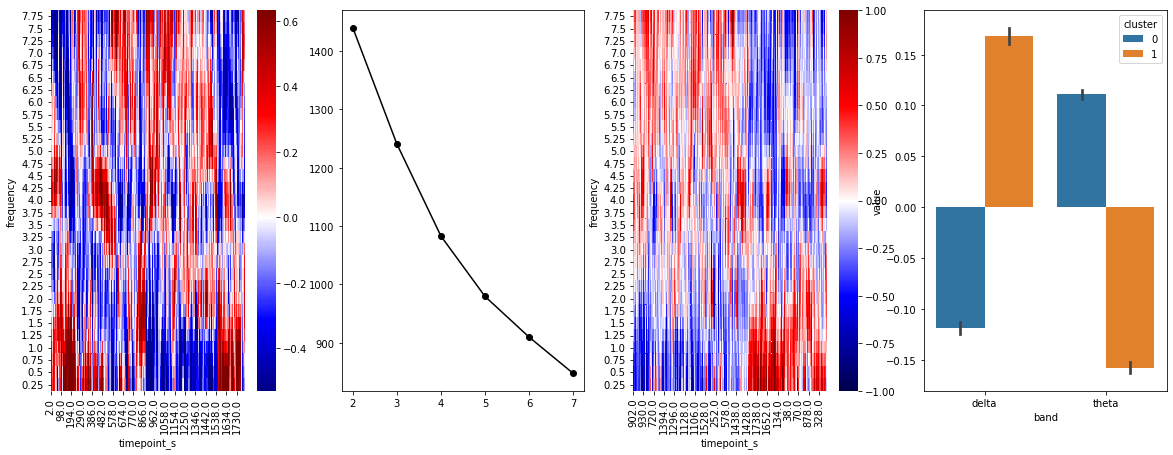

In [298]:
session_names = df_ts.session_name.unique()
session = session_names[13]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

hamilton_04


<Figure size 432x288 with 0 Axes>

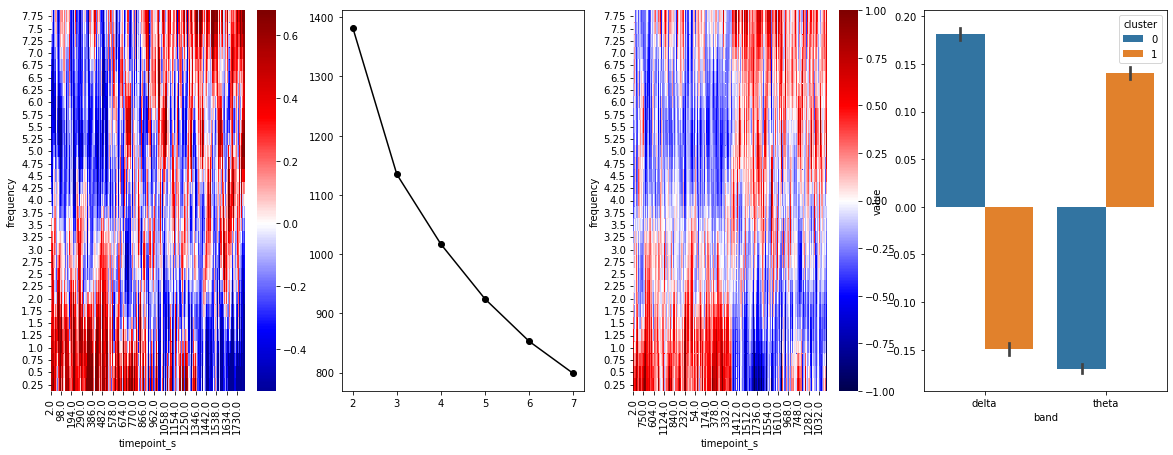

In [299]:
session_names = df_ts.session_name.unique()
session = session_names[14]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

hamilton_09


<Figure size 432x288 with 0 Axes>

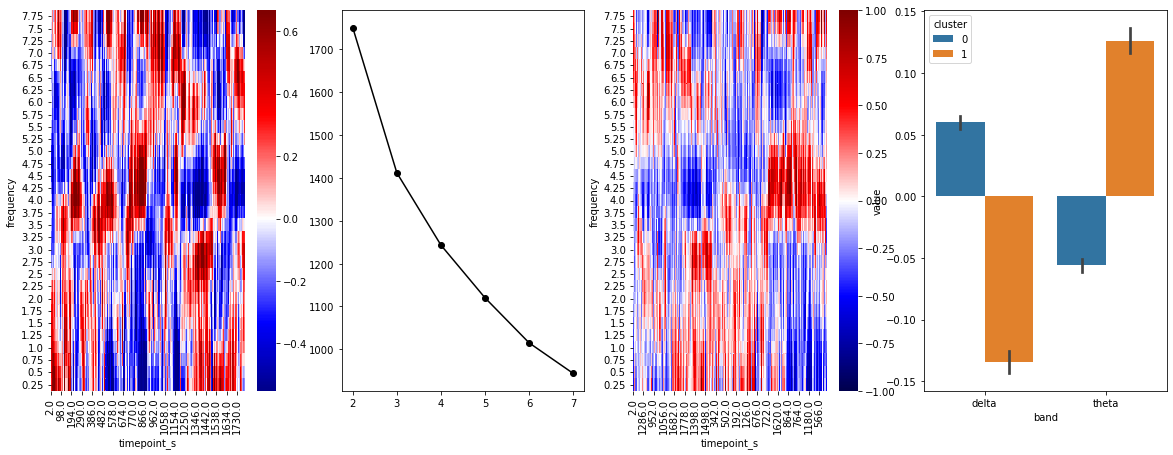

In [300]:
session_names = df_ts.session_name.unique()
session = session_names[15]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

hamilton_10


<Figure size 432x288 with 0 Axes>

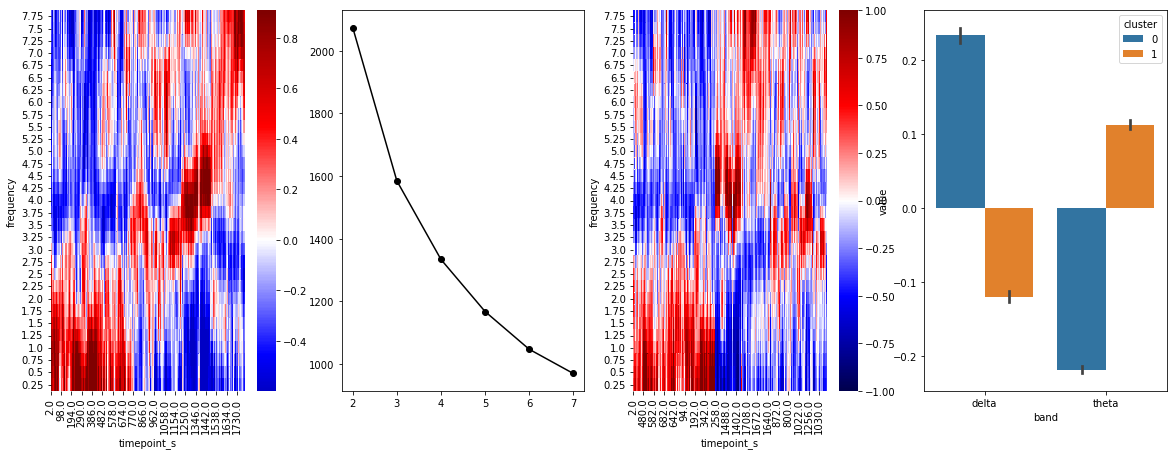

In [301]:
session_names = df_ts.session_name.unique()
session = session_names[16]
print(session)

df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
)
idx = IsolationForest().fit_predict(df1)
df1.iloc[idx == -1, :] = np.nan 
df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)



# double zscore first
plt.figure()
df2 = df1.apply(zscore).transpose().apply(zscore).transpose()


values = gaussian_filter(df2, sigma=(2, 2))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = plot_spectra(dfp, k_clusters=2)

IndexError: index 17 is out of bounds for axis 0 with size 17

In [178]:

# log first

# df2 = df1.apply(np.log)
# values = gaussian_filter(df2, sigma=(1, 1))
# dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)

# res = plot_spectra(dfp)


# # blur first
# plt.figure()
# values = gaussian_filter(df1, sigma=(1, 1))
# dfp = pd.DataFrame(values, index=df1.index, columns=df1.columns)
# dfp = dfp.apply(np.log)
# res = plot_spectra(dfp)


# # zscore first
# plt.figure()
# df2 = df1.apply(zscore)
# values = gaussian_filter(df2, sigma=(1, 1))
# dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
# res = plot_spectra(dfp, k_clusters=2)


# # log then zscore first
# plt= pd.DataFrame(values, index=df2.index, columns=df2.columns)
# res = plot_spectra(dfp, k_clusters=2)




# # double zscore first
# plt.figure()
# df2 = df1.transpose().apply(zscore).transpose().apply(zscore)
# values = gaussian_filter(df2, sigma=(2, 2))
# dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
# res = plot_spectra(dfp, k_clusters=2)


# # time zscore only
# plt.figure()
# df2 = df1.apply(np.log).transpose().apply(zscore).transpose()
# values = gaussian_filter(df2, sigma=(1, 1))
# dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
# res = plot_spectra(dfp, k_clusters=2).figure()
# df2 = df1.apply(np.log).apply(zscore)
# values = gaussian_filter(df2, sigma=(1, 1))
# dfp 

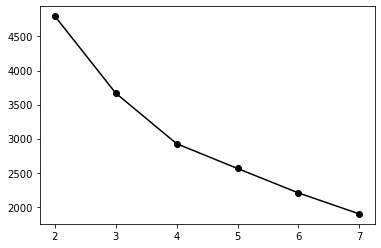

In [127]:
from sklearn.cluster import KMeans

n_clusters = list(range(2, 8))
error = []
for k in n_clusters:
    error.append(KMeans(k).fit(dfp).inertia_)
plt.plot(n_clusters, error, "k-o")

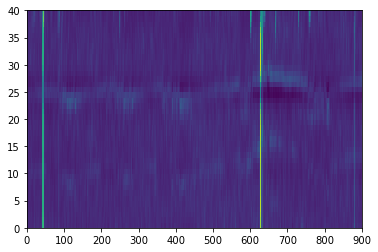

In [138]:
f  = plt.figure()
df2 = df1.apply(zscore)
values = gaussian_filter(df2, sigma=(1, 1))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = dfp.transpose().iloc[::-1]
ax = f.add_subplot()
ax.pcolor(dfp.values)
ax.set_xti
# sns.heatmap(dfp.transpose().iloc[::-1], robust=True, cmap="viridis")

Text(0.5, 1.0, 'hello')

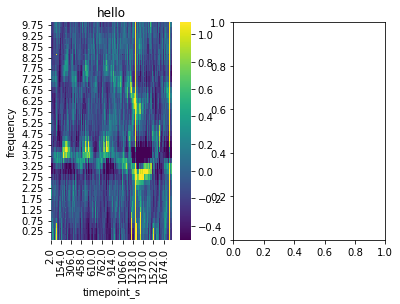

In [148]:
f, ax  = plt.subplots(ncols=2)
df2 = df1.apply(zscore)
values = gaussian_filter(df2, sigma=(1, 1))
dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
dfp = dfp.transpose().iloc[::-1]
ret = sns.heatmap(dfp, robust=True, cmap="viridis", ax=ax[0])
ax[0].set_title("hello")

In [144]:
f.axes[0]

<AxesSubplot:xlabel='frequency', ylabel='timepoint_s'>

In [125]:
m = KMeans(3).fit(dfp)

m.inertia_

KMeans(n_clusters=3)

<AxesSubplot:xlabel='timepoint_s', ylabel='frequency'>

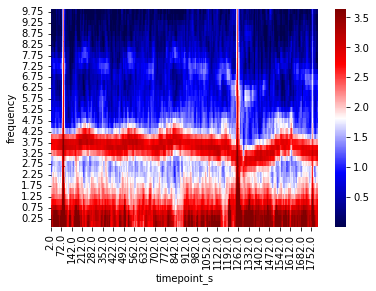

In [75]:
sns.heatmap(dfp.transpose().iloc[::-1], robust=True, cmap="seismic")

In [88]:
zscore(dfp.values, axis=None)

array([[ 0.9220171 ,  0.96777448,  0.99692004, ..., -0.43898796,
        -1.20639579, -1.60038458],
       [ 1.06191774,  0.89580919,  0.57320216, ..., -0.90082871,
        -1.19406269, -1.35736637],
       [ 0.8301538 ,  0.58551361,  0.13296384, ..., -0.86535773,
        -0.5512129 , -0.39439606],
       ...,
       [-0.4844254 , -0.62401491, -0.54990471, ..., -0.86823568,
        -0.24136225,  0.56186531],
       [-0.46733144, -0.52529081, -0.38012748, ..., -1.24663017,
        -0.7253836 , -0.00424271],
       [-0.56224349, -0.34559767,  0.02747037, ..., -1.44865857,
        -1.12407184, -0.42508134]])

In [5]:
session_name == "acute_11"

,frequency,fft_value,session_name,signal_name,timepoint_s,group_name
0,0.0,26.822464,ESHOCK_01,eeg_occ,2.0,shock
1,0.0,45.403559,ESHOCK_01,eeg_occ,4.0,shock
2,0.0,15.334193,ESHOCK_01,eeg_occ,6.0,shock
3,0.0,30.244243,ESHOCK_01,eeg_occ,8.0,shock
4,0.0,0.163717,ESHOCK_01,eeg_occ,10.0,shock
...,...,...,...,...,...,...
12795535,125.0,0.255806,acute_11,eeg_occ,3592.0,acute_saline
12795536,125.0,0.052543,acute_11,eeg_occ,3594.0,acute_saline
12795537,125.0,0.008791,acute_11,eeg_occ,3596.0,acute_saline
12795538,125.0,0.092031,acute_11,eeg_occ,3598.0,acute_saline
